In [1]:
# Data Preprocessing
%%capture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data =pd.read_csv('bank/bank.csv',sep=';')
col_cat = ['job','marital','education','default','housing','loan','contact','month','poutcome']
col_num = ['age','balance','day','duration','campaign','pdays','previous']
data_categorical = pd.get_dummies(data[col_cat])
data_numerical = data[col_num]
data_set = pd.concat([data_categorical,data_numerical],axis = 1)

from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
X =data_set.values
y = data['y']
y = y.ravel()
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)
feat_selector.fit(X, y)
feat_selector.support_
feat_selector.ranking_
X_filtered = feat_selector.transform(X)

x_feat = data_set.copy()
drop_col = x_feat.columns[feat_selector.ranking_ > 1]
x_feat.drop(drop_col,axis = 1, inplace=True)

In [40]:
y[y== 'no'] = -1
y[y == 'yes'] = 1

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_feat, y, test_size=0.30, random_state=0)
y=y.astype('str')

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [48]:
# from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1,n_estimators = 1000) # n_jobs=-1 uses all available cores
rf.fit(x_train, y_train)
predicted_label = rf.predict(x_test)
 # To Do: Plot a graph for number of estimators

Accuracy: 89.94%  Standard Deviation : 0.018
 Classification Report
             precision    recall  f1-score   support

         -1       0.92      0.96      0.94      1190
          1       0.61      0.40      0.48       167

avg / total       0.88      0.89      0.88      1357

Confusion Metrics: 
 [[1147   43]
 [ 101   66]]


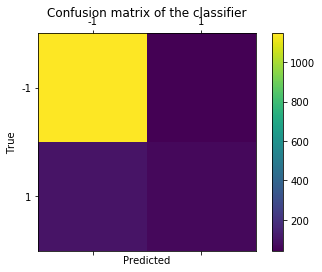

Test Accuracy of random forest 89.39%


In [50]:
#from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=30) # random state =seed
rf_kfold = model_selection.cross_val_score(rf, x_feat,y,cv = kfold, scoring='accuracy')
print(f"Accuracy: {round(rf_kfold.mean(),4)*100}%  Standard Deviation : {round(rf_kfold.std(),4)}")


report = classification_report(y_test, predicted_label)
print(f' Classification Report\n{report}')

from sklearn import metrics
labels=['-1','1']
cm = metrics.confusion_matrix(y_test, predicted_label, labels)
print(f'Confusion Metrics: \n {cm}')
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

score=rf.score(x_test,y_test)*100
print(f'Test Accuracy of random forest {round(score,2)}%')